<a href="https://colab.research.google.com/github/chunhaoc1/C3D-File-Analysis/blob/main/ColabC3D_Sample_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processing and Visualizing C3D Files Using Google Colab

This notebook is designed as an automated pipeline for conducting comprehensive data analysis on C3D files.

**Authors:**

Xin Shen - Master of Information Technology, University of Melbourne

* xsshen2@student.unimelb.edu.au


Chun-Hao Chen - Master of Information System, Universit of Melbourne

* chunhaoc1@student.unimelb.edu.au


Songxiang Tang - Master of Information System, University of Melbourne


* songxiangt@student.unimelb.edu.au

# Peperation



In [ ]:
#@title Step 1: Install Packages
import os
import sys
import time
def install(package):
    try:
        # Run the pip install command and suppress the output
        subprocess.check_call([sys.executable, "-m", "pip", "install", package], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        print(f"{package} installed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while installing {package}: {e}")

def install_conda(package):
    try:
        # Run the conda install command and suppress the output
        subprocess.check_call(["conda", "install", "-c", "conda-forge", package, "-y"], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
        print(f"{package} installed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while installing {package}: {e}")

packages = [
    "pyc3dtools",
    "ipywidgets",
    "pygwalker",
    "scipy",
    "numpy"
]

print("Installing packages...")

for i, package in enumerate(packages, 1):
    print(f"Installing {package} [{i}/{len(packages)}]")
    install(package)
    time.sleep(0.5)  # Simulate progress

# Installing condacolab and running conda install separately
install("condacolab")
import condacolab
condacolab.install()

print("Installing ezc3d...")
install_conda("ezc3d")

print("All packages installed.")


Installing packages...
Installing pyc3dtools [1/5]
pyc3dtools installed successfully.
Installing ipywidgets [2/5]
ipywidgets installed successfully.
Installing pygwalker [3/5]
pygwalker installed successfully.
Installing scipy [4/5]
scipy installed successfully.
Installing numpy [5/5]
numpy installed successfully.
condacolab installed successfully.
✨🍰✨ Everything looks OK!
Installing ezc3d...
ezc3d installed successfully.
All packages installed.


In [ ]:
#@title Step 2: Import packages
import ezc3d
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from google.colab import files,drive
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks,butter, filtfilt
from ipywidgets import FileUpload, widgets, interact, interactive

## Step 3: Load C3D File

You can load C3D files into this notebook using the following ways:

1. Manually upload from local

2. Import from Google Drive

### Upload from local

In [ ]:
file_name = ""

# Upload button setup
upload_btn = widgets.Button(description='Upload')
def upload_btn_eventhandler(obj):
    global file_name
    uploaded = files.upload()
    file_name = list(uploaded.keys())[0]
    print('Upload Completed ==> ' + file_name)

upload_btn.on_click(upload_btn_eventhandler)
display(upload_btn)

Please run the following code to check if the file has been successfully uploaded

In [ ]:
# After uploading, run this to load the file
if file_name:
    # Check if the file exists
    if os.path.isfile(file_name):
        print("File found:", file_name)
        # Load the C3D file
        try:
            c3d = ezc3d.c3d(file_name)
            print("C3D file loaded successfully!")
        except Exception as e:
            print(f"Error loading C3D file: {e}")
    else:
        print("File not found. Please check the upload process.")
else:
    print("No file uploaded yet. Please upload a file.")

### Import from Google Drive

To import file from Google Drive, you have to first mount your drive to this notebook.

By runing the following block of code, a new window will be opened and you can give premission for this notebook to have access to your Google Drive.

If you are uncomfortable with doing so, pleas download the file to local and upload using above steps.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After running the above code, your google drive pathway will be displayed on the side bar. Navigate to the folder storing your c3d files, and right click to copy the path to that file, fill in the following variable

In [ ]:
file_path = '/content/drive/MyDrive/Unimelb/M1S2/Intern/Sub_03_3ms.c3d' # replace this with your directory

Lastly, run this block of code to load the file

In [ ]:
c3d = ezc3d.c3d(file_path)

# Data Visualisation

In [ ]:
#@title Summary table of C3D File
summary_data = []

for key in c3d['parameters'].keys():
    param = c3d['parameters'][key]

    if isinstance(param, dict):
        for sub_key, value in param.items():
            summary_data.append({
                'Parameter': key,
                'Sub-Parameter': sub_key,
                'Description': value.get('description', ''),
                'Value': value.get('value', '')
            })
    else:
        summary_data.append({
            'Parameter': key,
            'Sub-Parameter': '',
            'Description': '',
            'Value': param
        })

df_summary = pd.DataFrame(summary_data)

pd.set_option('display.max_colwidth', None)
df_summary.style.set_table_styles([{
    'selector': 'thead th',
    'props': [('background-color', '#1f77b4'), ('color', 'white')]
}])

,Parameter,Sub-Parameter,Description,Value
0,TRIAL,__METADATA__,,
1,TRIAL,ACTUAL_START_FIELD,,[1 0]
2,TRIAL,ACTUAL_END_FIELD,,[12020 0]
3,TRIAL,CAMERA_RATE,,[100.]
4,TRIAL,X_DIRECTION,,[1]
5,TRIAL,Y_DIRECTION,,[3]
6,TRIAL,Z_DIRECTION,,[5]
7,SUBJECTS,__METADATA__,,
8,SUBJECTS,USED,,[1]
9,SUBJECTS,IS_STATIC,,[0]


In [ ]:
#@title Display analog labels
analog_data = c3d['data']['analogs']
analog_labels = c3d['parameters']['ANALOG']['LABELS']['value']
df_analog_labels = pd.DataFrame({
    'Channel Index': range(1, len(analog_labels) + 1),
    'Channel Label': analog_labels
})
df_analog_labels


,Channel Index,Channel Label
0,1,Force.Fx1
1,2,Force.Fy1
2,3,Force.Fz1
3,4,Moment.Mx1
4,5,Moment.My1
5,6,Moment.Mz1
6,7,Force.Fx2
7,8,Force.Fy2
8,9,Force.Fz2
9,10,Moment.Mx2


## Visualising Marker Position

In [ ]:
#@title Display list of markers
marker_labels = c3d['parameters']['POINT']['LABELS']['value']
df = pd.DataFrame({
    'Marker Index': range(1, len(marker_labels) + 1),
    'Marker Label': marker_labels
})

# Display the DataFrame as a pretty table
df


,Marker Index,Marker Label
0,1,LASIS
1,2,RASIS
2,3,LPSIS
3,4,RPSIS
4,5,LLTHI
5,6,LLEK
6,7,LLSHA
7,8,LLM
8,9,LHEE
9,10,LMT2


You can adjust the marker you want to visualise.

In [ ]:
marker_index = 8 # replace with the index of marker you want to visualise

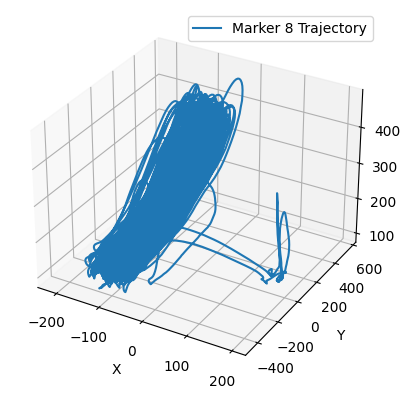

In [ ]:
#@title Visualise
marker_positions = c3d['data']['points'][:3, :, :]
marker_index -= 1

x = marker_positions[0, marker_index, :]
y = marker_positions[1, marker_index, :]
z = marker_positions[2, marker_index, :]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, label=f'Marker {marker_index + 1} Trajectory')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


## Time Series Analaysis

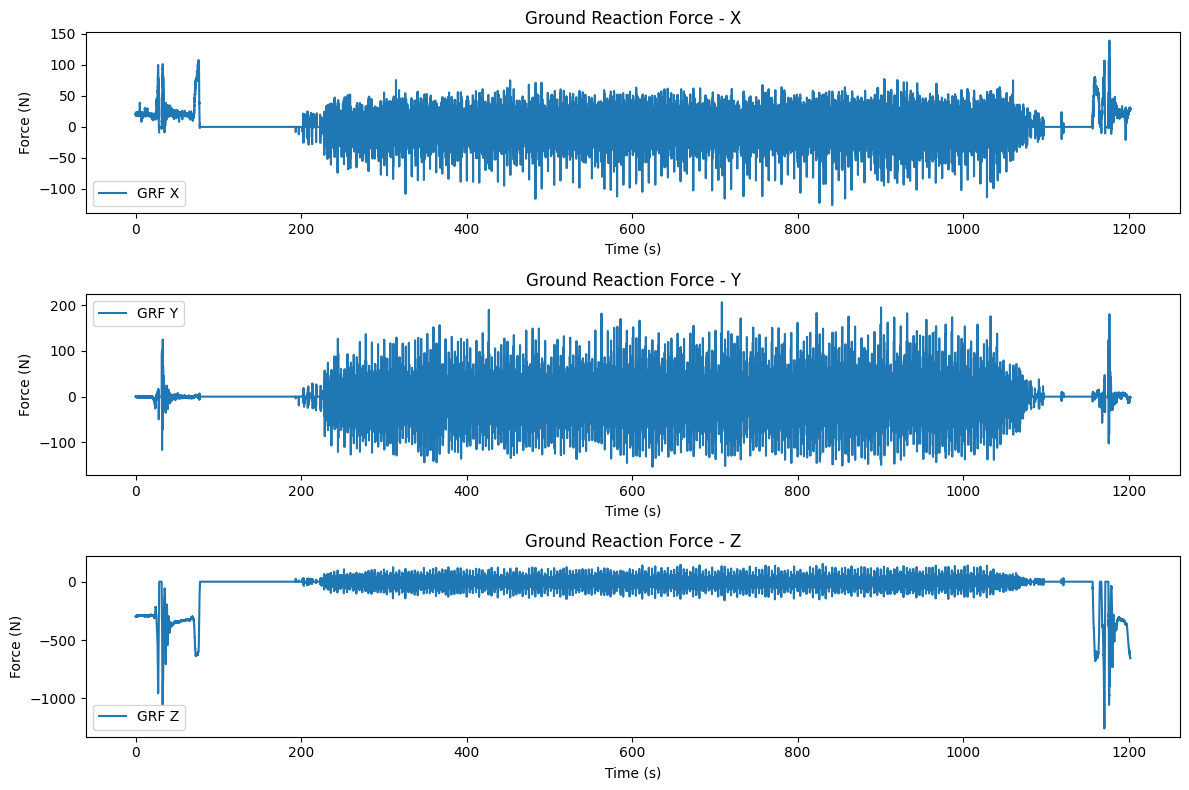

In [ ]:
#@title Visualise Ground Reaction Force First Force Plate

grf_x = analog_data[0, 0, :]
grf_y = analog_data[0, 1, :]
grf_z = analog_data[0, 2, :]
n_frames = len(grf_x)
time = np.arange(0, n_frames) / c3d['header']['points']['frame_rate']

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, grf_x, label="GRF X")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Ground Reaction Force - X")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, grf_y, label="GRF Y")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Ground Reaction Force - Y")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, grf_z, label="GRF Z")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Ground Reaction Force - Z")
plt.legend()

plt.tight_layout()
plt.show()

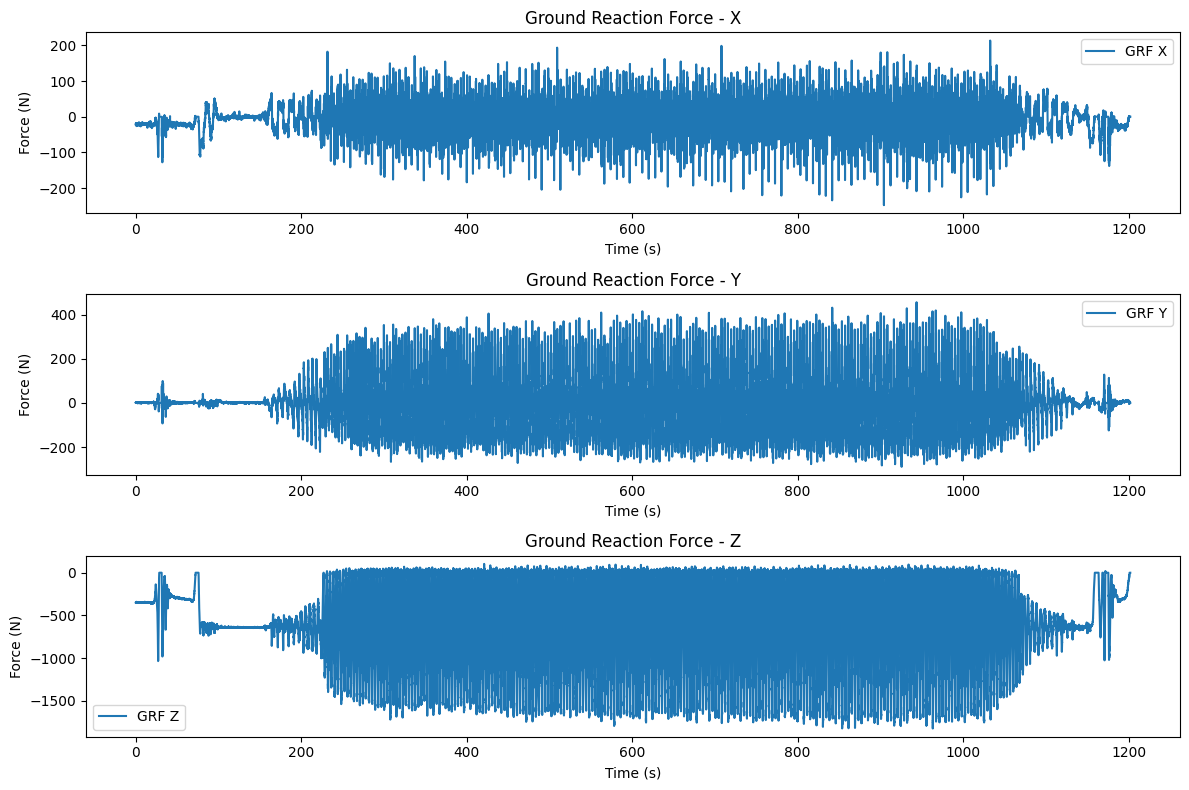

In [ ]:
#@title Visualise Ground Reaction Force Second Force Plate

grf_x = analog_data[0, 6, :]
grf_y = analog_data[0, 7, :]
grf_z = analog_data[0, 8, :]
n_frames = len(grf_x)
time = np.arange(0, n_frames) / c3d['header']['points']['frame_rate']

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, grf_x, label="GRF X")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Ground Reaction Force - X")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, grf_y, label="GRF Y")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Ground Reaction Force - Y")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, grf_z, label="GRF Z")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.title("Ground Reaction Force - Z")
plt.legend()

plt.tight_layout()
plt.show()

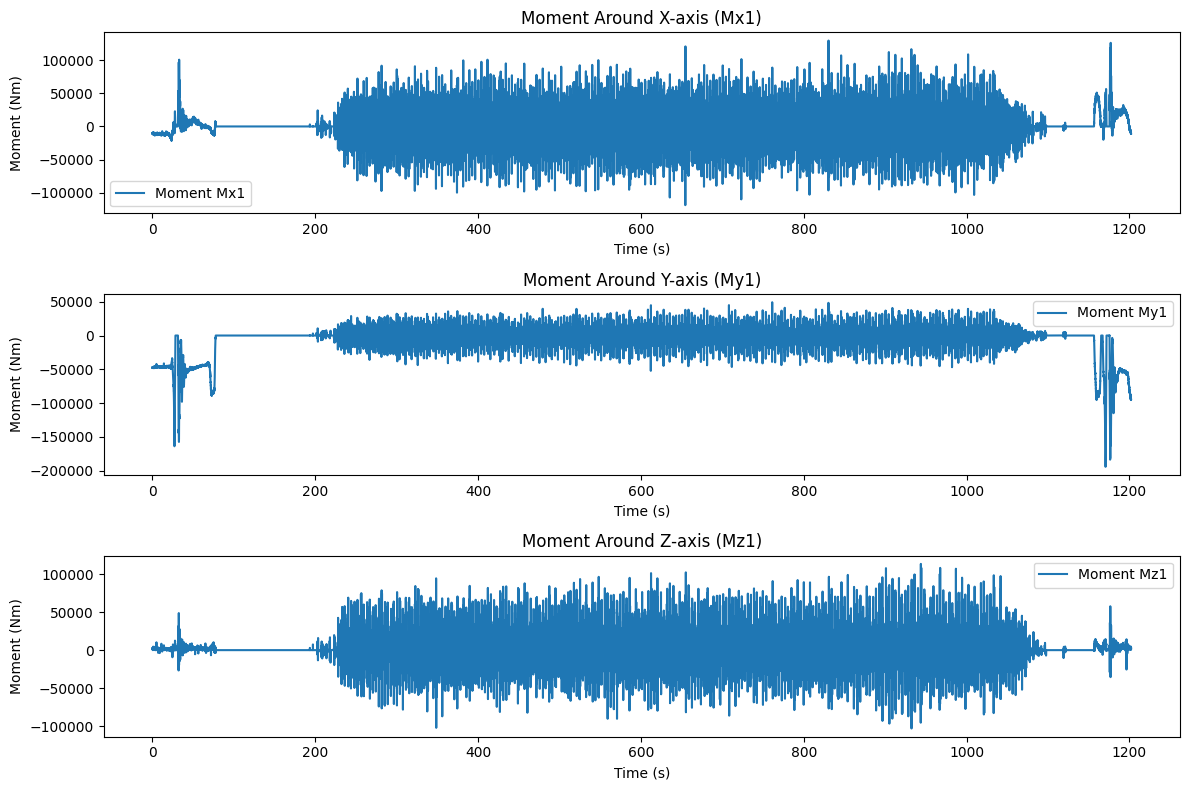

In [ ]:
#@title Visualise Momentum

moment_mx = analog_data[0,3, :]
moment_my = analog_data[0,4, :]
moment_mz = analog_data[0,5, :]

time = np.arange(0, len(moment_mx)) / c3d['header']['points']['frame_rate']

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, moment_mx, label="Moment Mx1")
plt.xlabel("Time (s)")
plt.ylabel("Moment (Nm)")
plt.title("Moment Around X-axis (Mx1)")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, moment_my, label="Moment My1")
plt.xlabel("Time (s)")
plt.ylabel("Moment (Nm)")
plt.title("Moment Around Y-axis (My1)")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, moment_mz, label="Moment Mz1")
plt.xlabel("Time (s)")
plt.ylabel("Moment (Nm)")
plt.title("Moment Around Z-axis (Mz1)")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#@title Visualise Acceleration (X Axis)

acc1x = analog_data[0,12, :]
acc2x = analog_data[0,15, :]
acc3x = analog_data[0,18, :]

def plot_time_window(center_point):
    window_size = 10
    start_time = max(0, center_point - window_size)
    end_time = min(time[-1], center_point + window_size)

    time_window = (time >= start_time) & (time <= end_time)

    plt.figure(figsize=(10, 6))
    plt.plot(time[time_window], acc1x[time_window], label="acc1x (Trunk)")
    plt.plot(time[time_window], acc2x[time_window], label="acc2x (Thigh)")
    plt.plot(time[time_window], acc3x[time_window], label="acc3x (Foot)")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s²)")
    plt.title(f"Acceleration in X-axis from Accelerometers (Window around {center_point}s)")
    plt.legend()
    plt.grid(True)
    plt.show()

interact(plot_time_window, center_point=widgets.FloatSlider(min=0, max=time[-1], step=0.1, value=time[-1]/2))

interactive(children=(FloatSlider(value=600.995, description='center_point', max=1201.99), Output()), _dom_cla…

<function __main__.plot_time_window(center_point)>

In [ ]:
#@title Visualise Acceleration (Y Axis)

acc1y = analog_data[0,13, :]
acc2y = analog_data[0,16, :]
acc3y = analog_data[0,19, :]

def plot_time_window(center_point):
    window_size = 10
    start_time = max(0, center_point - window_size)
    end_time = min(time[-1], center_point + window_size)
    time_window = (time >= start_time) & (time <= end_time)

    plt.figure(figsize=(10, 6))
    plt.plot(time[time_window], acc1y[time_window], label="acc1y (Trunk)")
    plt.plot(time[time_window], acc2y[time_window], label="acc2y (Thigh)")
    plt.plot(time[time_window], acc3y[time_window], label="acc3y (Foot)")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s²)")
    plt.title(f"Acceleration in Y-axis from Accelerometers (Window around {center_point}s)")
    plt.legend()
    plt.grid(True)
    plt.show()
interact(plot_time_window, center_point=widgets.FloatSlider(min=0, max=time[-1], step=0.1, value=time[-1]/2))

interactive(children=(FloatSlider(value=600.995, description='center_point', max=1201.99), Output()), _dom_cla…

<function __main__.plot_time_window(center_point)>

In [ ]:
#@title Visualise Acceleration (Z Axis)

acc1z = analog_data[0,14, :]
acc2z = analog_data[0,17, :]
acc3z = analog_data[0,20, :]

def plot_time_window(center_point):
    window_size = 10
    start_time = max(0, center_point - window_size)
    end_time = min(time[-1], center_point + window_size)

    time_window = (time >= start_time) & (time <= end_time)

    plt.figure(figsize=(10, 6))
    plt.plot(time[time_window], acc1z[time_window], label="acc1z (Trunk)")
    plt.plot(time[time_window], acc2z[time_window], label="acc2z (Thigh)")
    plt.plot(time[time_window], acc3z[time_window], label="acc3z (Foot)")
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration (m/s²)")
    plt.title(f"Acceleration in Z-axis from Accelerometers (Window around {center_point}s)")
    plt.legend()
    plt.grid(True)
    plt.show()

interact(plot_time_window, center_point=widgets.FloatSlider(min=0, max=time[-1], step=0.1, value=time[-1]/2))

interactive(children=(FloatSlider(value=600.995, description='center_point', max=1201.99), Output()), _dom_cla…

<function __main__.plot_time_window(center_point)>

In [ ]:
#@title Visualise EMG Signal
emg_signals = [analog_data[0,i, :] for i in range(21, 37)]

time = np.arange(0, len(emg_signals[0])) / c3d['header']['points']['frame_rate']
def plot_emg(selected_emgs):
    plt.figure(figsize=(12, 8))
    for emg_index in selected_emgs:
        plt.plot(time, emg_signals[emg_index - 1], label=f'emg{emg_index}')
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (µV)")
    plt.title("Raw EMG Signals")
    plt.legend()
    plt.grid(True)
    plt.show()

emg_selector = widgets.SelectMultiple(
    options=[(f'EMG {i}', i) for i in range(1, 17)],
    value=[1],
    description='EMG Channels',
    disabled=False
)

interact(plot_emg, selected_emgs=emg_selector)

interactive(children=(SelectMultiple(description='EMG Channels', index=(0,), options=(('EMG 1', 1), ('EMG 2', …

<function __main__.plot_emg(selected_emgs)>

In [ ]:
#@title Visualise EMG Signal Root Mean Square

emg_signals = [analog_data[0,i, :] for i in range(21, 37)]

time = np.arange(0, len(emg_signals[0])) / c3d['header']['points']['frame_rate']

def compute_rms(emg_signal, window_size=200):
    return np.sqrt(np.convolve(emg_signal**2, np.ones(window_size)/window_size, mode='valid'))

def plot_rms(selected_emgs, window_size=200):
    plt.figure(figsize=(12, 8))
    for emg_index in selected_emgs:
        emg_rms = compute_rms(emg_signals[emg_index - 1], window_size)
        time_rms = np.linspace(0, len(emg_rms) / c3d['header']['points']['frame_rate'], len(emg_rms))
        plt.plot(time_rms, emg_rms, label=f'emg{emg_index} RMS')
    plt.xlabel("Time (s)")
    plt.ylabel("RMS Voltage (µV)")
    plt.title("RMS of EMG Signals")
    plt.legend()
    plt.grid(True)
    plt.show()

emg_selector = widgets.SelectMultiple(
    options=[(f'EMG {i}', i) for i in range(1, 17)],
    value=[1],
    description='EMG Channels',
    disabled=False
)

window_size_slider = widgets.IntSlider(
    value=200,
    min=10,
    max=1000,
    step=10,
    description='Window Size:',
    continuous_update=False
)

interact(plot_rms, selected_emgs=emg_selector, window_size=window_size_slider)

interactive(children=(SelectMultiple(description='EMG Channels', index=(0,), options=(('EMG 1', 1), ('EMG 2', …

<function __main__.plot_rms(selected_emgs, window_size=200)>

# Data Processing and Analysis

In [ ]:
#@title Event Detection

grf_left = analog_data[0,2, :]
grf_right = analog_data[0,8, :]

frame_rate = c3d['header']['points']['frame_rate']
time = np.arange(0, grf_left.shape[0]) / frame_rate

heel_strikes_left, _ = find_peaks(grf_left, height=50)
heel_strikes_right, _ = find_peaks(grf_right, height=50)

toe_offs_left = np.where(grf_left < 10)[0]
toe_offs_right = np.where(grf_right < 10)[0]

toe_offs_left = [t for t in toe_offs_left if any(abs(t - hs) > 100 for hs in heel_strikes_left)]
toe_offs_right = [t for t in toe_offs_right if any(abs(t - hs) > 100 for hs in heel_strikes_right)]

events = []

for hs in heel_strikes_left:
    events.append({'Gait Cycle': 'Left Leg', 'Event': 'Heel Strike', 'Time (s)': time[hs]})
for to in toe_offs_left:
    events.append({'Gait Cycle': 'Left Leg', 'Event': 'Toe Off', 'Time (s)': time[to]})
for hs in heel_strikes_right:
    events.append({'Gait Cycle': 'Right Leg', 'Event': 'Heel Strike', 'Time (s)': time[hs]})
for to in toe_offs_right:
    events.append({'Gait Cycle': 'Right Leg', 'Event': 'Toe Off', 'Time (s)': time[to]})
event_table = pd.DataFrame(events)

event_table = event_table.sort_values(by='Time (s)')

time_range_slider = widgets.FloatRangeSlider(
    value=[0, time[-1]],
    min=0,
    max=time[-1],
    step=0.1,
    description='Time Range (s):',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

def filter_table(time_range):
    filtered_table = event_table[(event_table['Time (s)'] >= time_range[0]) & (event_table['Time (s)'] <= time_range[1])]
    display(filtered_table)

interact(filter_table, time_range=time_range_slider)

interactive(children=(FloatRangeSlider(value=(0.0, 1201.99), continuous_update=False, description='Time Range …

<function __main__.filter_table(time_range)>

In [ ]:
#@title Static Calibration with EMG
emg_channels = {
    'EMG 1': analog_data[0,21, :],
    'EMG 2': analog_data[0,22, :],
    'EMG 3': analog_data[0,23, :],
    'EMG 4': analog_data[0,24, :],
    'EMG 5': analog_data[0,25, :],
    'EMG 6': analog_data[0,26, :],
    'EMG 7': analog_data[0,27, :],
    'EMG 8': analog_data[0,28, :],
    'EMG 9': analog_data[0,29, :],
    'EMG 10': analog_data[0,30, :],
    'EMG 11': analog_data[0,31, :],
    'EMG 12': analog_data[0,32, :],
    'EMG 13': analog_data[0,33, :],
    'EMG 14': analog_data[0,34, :],
    'EMG 15': analog_data[0,35, :],
    'EMG 16': analog_data[0,36, :],
}

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def process_emg(emg_selection):
    fs = 100
    emg_data = emg_channels[emg_selection]

    emg_filtered = butter_bandpass_filter(emg_data, 20, 40, fs)

    emg_rectified = np.abs(emg_filtered)

    emg_rms = np.sqrt(np.convolve(emg_rectified**2, np.ones(200)/200, mode='valid'))
    time_rms = np.linspace(0, len(emg_rms) / fs, len(emg_rms))

    plt.figure(figsize=(12, 6))
    plt.plot(time_rms, emg_rms, label=f'{emg_selection} RMS')
    plt.xlabel("Time (s)")
    plt.ylabel("RMS Voltage (µV)")
    plt.title(f'RMS EMG for {emg_selection}')
    plt.grid(True)
    plt.legend()
    plt.show()

emg_dropdown = widgets.Dropdown(
    options=emg_channels.keys(),
    value='EMG 1',
    description='Select EMG:',
    disabled=False,
)

interact(process_emg, emg_selection=emg_dropdown)


interactive(children=(Dropdown(description='Select EMG:', options=('EMG 1', 'EMG 2', 'EMG 3', 'EMG 4', 'EMG 5'…

<function __main__.process_emg(emg_selection)>